# NLP ASTRONOMY PROJECT

**Authors**
- Grzegorz Kaminski: 5732727
- Maciej Lewiński: 5687632
- Shourya Bhandari: 5226597
- Toma Vučinić: 5748070
- Jakub Wysocki: 5689996

In this project, research questions about the astronomy subreddit will be investigated:
1. RQ1: What features and functionalities do users value most in stargazing apps and astronomy software?
2. RQ2: What hardware specifications are discussed and desired most frequently by the community?
3. RQ3: What locations are most frequently recommended or discussed for photographing astronomical objects or events?

In [1]:
# General import statements
import json
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

# DATASET INSPECTION

In [2]:
from HelperFunctions import load_ndjson

comments_file = "astronomy_comments.ndjson"
submissions_file = "astronomy_submissions.ndjson"

# Pandas dataframe storing comments and submissions
comments_df = load_ndjson(comments_file)
submissions_df = load_ndjson(submissions_file)

print(f"Successfully loaded Reddit comments. Our dataset includes {comments_df.shape[0]} Reddit comments \n")
print(f"Successfully loaded Reddit submissions. Our dataset includes {submissions_df.shape[0]} Reddit submissions\n")

Successfully loaded Reddit comments. Our dataset includes 64271 Reddit comments 

Successfully loaded Reddit submissions. Our dataset includes 8058 Reddit submissions



In [3]:
print("Comments Keys:\n")
print(comments_df.columns.tolist())
print("Comments Sample:\n")
comments_df.head()

Comments Keys:

['all_awardings', 'archived', 'associated_award', 'author', 'author_created_utc', 'author_flair_background_color', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_template_id', 'author_flair_text', 'author_flair_text_color', 'author_flair_type', 'author_fullname', 'author_patreon_flair', 'author_premium', 'body', 'can_gild', 'collapsed', 'collapsed_because_crowd_control', 'collapsed_reason', 'collapsed_reason_code', 'comment_type', 'controversiality', 'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id', 'is_submitter', 'link_id', 'locked', 'name', 'no_follow', 'parent_id', 'permalink', 'retrieved_on', 'score', 'score_hidden', 'send_replies', 'stickied', 'subreddit', 'subreddit_id', 'subreddit_name_prefixed', 'subreddit_type', 'top_awarded_type', 'total_awards_received', 'treatment_tags', 'unrepliable_reason', 'author_cakeday', 'editable']
Comments Sample:



,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable
0,[],False,None,rara0o,1.627269e+09,None,None,[],None,None,...,Astronomy,t5_2qhor,r/Astronomy,public,None,0,[],None,NaN,NaN
1,[],False,None,The_Dead_See,1.364700e+09,None,None,[],None,None,...,Astronomy,t5_2qhor,r/Astronomy,public,None,0,[],None,NaN,NaN
2,[],False,None,CeaselessStumblingOn,1.610957e+09,None,None,[],None,None,...,Astronomy,t5_2qhor,r/Astronomy,public,None,0,[],None,NaN,NaN
3,[],False,None,[deleted],NaN,,None,NaN,None,None,...,Astronomy,t5_2qhor,r/Astronomy,public,None,0,[],None,NaN,NaN
4,[],False,None,Ok-Golf-58,1.601784e+09,None,None,[],None,None,...,Astronomy,t5_2qhor,r/Astronomy,public,None,0,[],None,NaN,NaN


In [4]:
print("Submissions Keys:\n")
print(submissions_df.columns.tolist())
print("Submissions Sample:\n")
submissions_df.head()

Submissions Keys:

['all_awardings', 'allow_live_comments', 'archived', 'author', 'author_created_utc', 'author_flair_background_color', 'author_flair_css_class', 'author_flair_template_id', 'author_flair_text', 'author_flair_text_color', 'awarders', 'banned_by', 'can_gild', 'can_mod_post', 'category', 'content_categories', 'contest_mode', 'created_utc', 'discussion_type', 'distinguished', 'domain', 'edited', 'gilded', 'gildings', 'hidden', 'hide_score', 'id', 'is_created_from_ads_ui', 'is_crosspostable', 'is_meta', 'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video', 'link_flair_background_color', 'link_flair_css_class', 'link_flair_richtext', 'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked', 'media', 'media_embed', 'media_only', 'name', 'no_follow', 'num_comments', 'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls', 'quarantine', 'removed_by', 'removed_by_category', 'retrieved_on', 'ret

,all_awardings,allow_live_comments,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,author_fullname,author_patreon_flair,author_premium,post_hint,preview,gallery_data,is_gallery,media_metadata,author_cakeday,call_to_action
0,[],False,False,[deleted],NaN,,None,None,None,dark,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,False,[deleted],NaN,,None,None,None,dark,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,False,Soliastro,1.578060e+09,None,None,None,None,None,...,t2_5d0qj1f3,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,False,Walden_Schmidt,1.648920e+09,None,None,None,None,None,...,t2_lg91j5ak,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,False,Mammoth_Lifeguard_57,1.653326e+09,None,None,None,None,None,...,t2_njc2v380,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the inspection we can see that:
1. The dataset contains 64271 comments
2. The dataset contains 8058 submissions
3. The relevant keys in the comments include {'id', 'author', 'link_id', 'parent_id', 'created_utc', 'body', 'score'}
4. The relevant keys in the submissions include {'title', 'selftext', 'created_utc', 'url', 'score', 'num_comments'}

# PREPROCESSING

Given the raw comments and submissions, the following preprocessing steps are applied:
1. Only the relevant keys for the comments and submissions are retained
2. Any rows with '[deleted]' or '[removed]' in text fields is removed
3. Timestamps are converted to datetime format for potentially analysing temporal behaviour
4. Preparation and Loading Dataset
5. Regular Expression Analysis: Store url domains that mention software related terms for RQ1
6. Text Preprocessing: Expanding contractions, case folding, removing links, removing punctuation, removing extra whitespaces, tokenization, lemmatization 

## Retaining Relevant Keys

In [5]:
from Preprocessing import retain_relevant_keys

comments_df, submissions_df = retain_relevant_keys(comments_df, submissions_df)

Sanity Check
Relevant keys for Comments:  Index(['id', 'author', 'link_id', 'parent_id', 'created_utc', 'body', 'score'], dtype='object')
Relevant keys for Submissions:  Index(['title', 'selftext', 'created_utc', 'url', 'score', 'num_comments'], dtype='object')


## Removing Deleted Text Fields

In [6]:
from Preprocessing import remove_deleted_text_fields

comments_df, submissions_df = remove_deleted_text_fields(comments_df, submissions_df)

Sanity Check
Number of deleted comments after removal: 0
Number of deleted submissions after removal: 0
Number of comments after removal: 58807
Number of submissions after removal: 683


Note: The number of submissions has reduced by more than 90%!!!

## Convert UTC timestamps to datetime format

In [7]:
from Preprocessing import convert_timestamps_to_datetime

comments_df, submissions_df = convert_timestamps_to_datetime(comments_df, submissions_df)
comments_df['created_utc'] = comments_df['created_utc'].astype(str)
submissions_df['created_utc'] = submissions_df['created_utc'].astype(str)

Note: datetime format has been converted to string to ensure compatibility with json formatting.

## Preparation and Loading Dataset

In [8]:
from HelperFunctions import load_reddit_data

comments, submissions = load_reddit_data(comments_df, submissions_df)

## Regular Expression Analysis: Store URLs that mention 'software' related terms for RQ1

In [9]:
from HelperFunctions import search_pattern

software_related_terms_regex = r'\b[Aa]pps?\b|\b[Aa]pplications?\b|\b[Ss]oftware\b|\b[Pp]rograms?\b|\b[Pp]latforms?\b|\b[Tt]ools?\b'

comments_mentioning_software = search_pattern(software_related_terms_regex, comments['body'])
submissions_mentioning_software = search_pattern(software_related_terms_regex, submissions['selftext'])

In [10]:
from HelperFunctions import extract_urls

urls_in_comments_mentioning_software = extract_urls(comments_mentioning_software)
urls_in_submissions_mentioning_software = extract_urls(submissions_mentioning_software)

print(f"Overall we find {len(urls_in_comments_mentioning_software)} URLs in the comments mentioning software")
print("Some examples below...")
print(urls_in_comments_mentioning_software[:2])

print(f"Overall we find {len(urls_in_submissions_mentioning_software)} URLs in the submissions mentioning software")
print("Some examples below...")
print(urls_in_submissions_mentioning_software[:2])

Overall we find 639 URLs in the comments mentioning software
Some examples below...
['https://play.google.com/store/apps/details?id=com.waddensky.nightshift&amp;referrer=utm_source%3Dreddit%26utm_medium%3Dforum%26utm_campaign%3Dpost).', 'http://heavens-above.com/)']
Overall we find 32 URLs in the submissions mentioning software
Some examples below...
['https://youtu.be/2xZgCVG_Bzk', 'https://youtu.be/fakankfe8co']


In [11]:
from HelperFunctions import extract_domain
from collections import Counter

domains_in_comments_mentioning_software = [extract_domain(x) for x in urls_in_comments_mentioning_software]
print("Most popular domains in comments mentioning software")
print(Counter(domains_in_comments_mentioning_software).most_common(20))

domains_in_submissions_mentioning_software = [extract_domain(x) for x in urls_in_submissions_mentioning_software]
print("Most popular domains in submissions mentioning software")
print(Counter(domains_in_submissions_mentioning_software).most_common(20))

Most popular domains in comments mentioning software
[('instagram.com', 43), ('wikipedia.org', 38), ('reddit.com', 36), ('imgur.com', 30), ('youtube.com', 29), ('nasa.gov', 27), ('stsci.edu', 24), ('google.com', 22), ('github.com', 22), ('youtu.be', 19), ('stellarium.org', 18), ('', 16), ('flickr.com', 12), ('lis.tn', 12), ('goo.gl', 10), ('amazon.com', 10), ('prabhuastrophotography.com', 10), ('astrobin.com', 9), ('skyandtelescope.org', 9), ('astrob.in', 8)]
Most popular domains in submissions mentioning software
[('youtu.be', 4), ('github.com', 4), ('redd.it', 4), ('nasa.gov', 3), ('imgur.com', 2), ('reddit.com', 1), ('pinimg.com', 1), ('shopify.com', 1), ('instructables.com', 1), ('office.com', 1), ('nsf.gov', 1), ('', 1), ('noaa.gov', 1), ('discoverhawaiiscience.com', 1), ('coursera.org', 1), ('ucsd.edu', 1), ('wikipedia.org', 1), ('xkcd.com', 1), ('mapthematics.com', 1), ('github.io', 1)]


## Text Preprocessing

### Obtaining sentences and words in the reddit comments

The sentences for each comment are stored in comments['sentences'] (type: list)

The words for each comment are stored in comments['words'] (type: list)

All the sentences present in the reddit comments is stored in *all_comments_sentences*

All the words present in the reddit comments is stored in *all_comments_words*

In [12]:
from Preprocessing import preprocess_text

comments['sentences'] = []
comments['words'] = []
all_comments_sentences = []
all_comments_words = []

for i in range(len(comments['body'])):
    sentences, words = preprocess_text(comments['body'][i])
    comments['sentences'].append(sentences)
    comments['words'].append(words)
    all_comments_sentences.extend(sentences)
    all_comments_words.extend(words)

### Obtaining sentences and words in the reddit submissions

The sentences for each submission are stored in submissions['sentences'] (type: list)

The words for each submission are stored in submission['words'] (type: list)

All the sentences present in the reddit submissions is stored in *all_submissions_sentences*

All the words present in the reddit submissions is stored in *all_submissions_words*

In [13]:
from Preprocessing import preprocess_text

submissions['sentences'] = []
submissions['words'] = []
all_submissions_sentences = []
all_submissions_words = []

for i in range(len(submissions['selftext'])):
    sentences, words = preprocess_text(submissions['selftext'][i])
    submissions['sentences'].append(sentences)
    submissions['words'].append(words)
    all_submissions_sentences.extend(sentences)
    all_submissions_words.extend(words)

### Concatenating comments and submissions  

In [14]:
all_sentences = all_comments_sentences + all_submissions_sentences
all_words = all_comments_words + all_submissions_words
print(f"The total number of sentences and words in the entire reddit dataset is {len(all_sentences)} and {len(all_words)} respectively")
print(f"The total number of sentences and words in the reddit comments is {len(all_comments_sentences)} and {len(all_comments_words)} respectively")
print(f"The total number of sentences and words in the reddit submissions is {len(all_submissions_sentences)} and {len(all_submissions_words)} respectively")

The total number of sentences and words in the entire reddit dataset is 127327 and 840347 respectively
The total number of sentences and words in the reddit comments is 123835 and 808076 respectively
The total number of sentences and words in the reddit submissions is 3492 and 32271 respectively


## Saving sentences and words in text files

In [15]:
from HelperFunctions import save_comments_to_json, save_submissions_to_json

save_comments_to_json(comments, "preprocessed_comments_json_format.ndjson")
save_submissions_to_json(submissions, "preprocessed_submissions_json_format.ndjson")

In [16]:
from HelperFunctions import write_to_text_file

write_to_text_file(all_comments_sentences, "preprocessed_comments_sentences")
write_to_text_file(all_comments_words, "preprocessed_comments_words")
write_to_text_file(all_submissions_sentences, "preprocessed_submissions_sentences")
write_to_text_file(all_submissions_words, "preprocessed_submissions_words")

# RQ1: Most Valued Features/Functionalities in Astronomy Apps/Software

 sky mapping : Average Compound Score = 0.83915
 assistance : Average Compound Score = 0.8277142857142857
 telescope control : Average Compound Score = 0.7845
 ar/augmented reality : Average Compound Score = 0.6704416666666667
 satellite tracking : Average Compound Score = 0.60755
 light pollution map : Average Compound Score = 0.5910000000000001
 skyview : Average Compound Score = 0.5503810810810811
 night sky : Average Compound Score = 0.5334178913738024
 night mode : Average Compound Score = 0.5250785714285715
 star walk : Average Compound Score = 0.5077176470588236
 skysafari : Average Compound Score = 0.44581
 stellarium : Average Compound Score = 0.40970977777777745
 time travel : Average Compound Score = 0.3255
 vr/virtual reality : Average Compound Score = 0.28896153846153855
 skyguide : Average Compound Score = 0.27842
 star identification : Average Compound Score = 0
 3d view : Average Compound Score = 0.0
 meteor shower prediction : Average Compound Score = 0
 observation lo

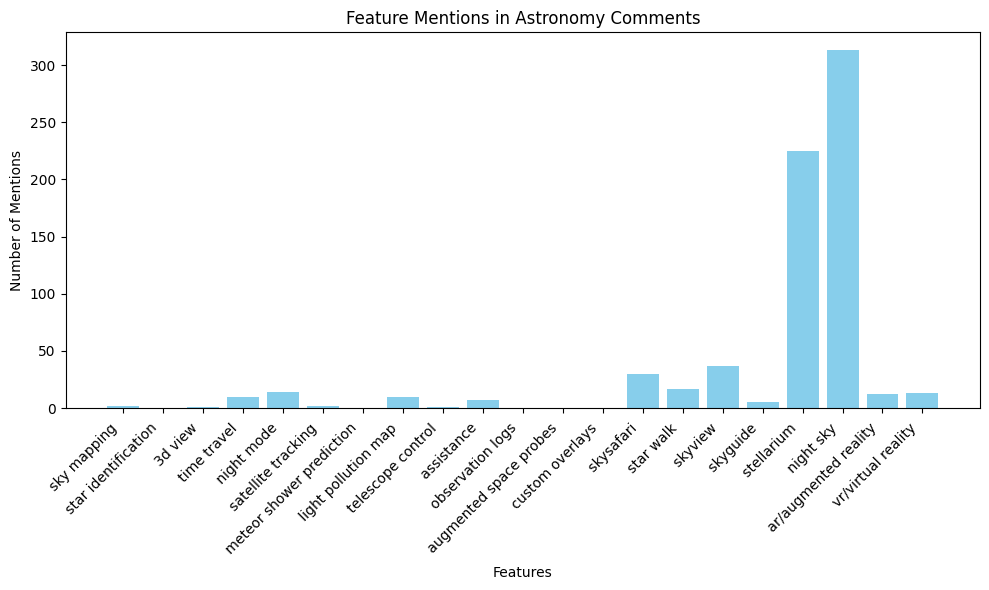

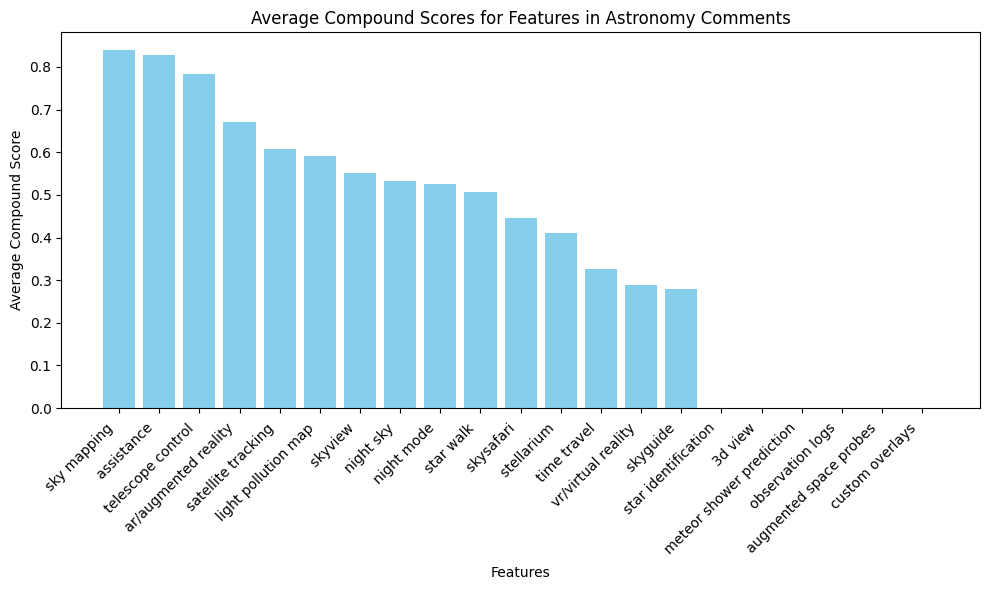

In [5]:
from HelperFunctions import open_preprocessed_comments_json, open_comments_entry_id, sentiment_analysis, check_features, calculate_average_compound_scores, sort_avg_compound_scores, plot_avg_compound_scores, plot_feature_mentions


keywords = [" sky mapping ", " star identification ", " augmented reality ", " ar ", " vr ", " virtual reality ", " 3d view ",
             " time travel ", " night mode ", " satellite tracking ", " meteor shower prediction ", " light pollution map ",
             " telescope control ",  " assistance ", " observation logs ", " augmented space probes ",
             " custom overlays ", " skysafari ", " star walk ", " skyview ", " skyguide ", " stellarium ", " night sky "]

processed_comments = open_preprocessed_comments_json()
not_processed_comments = open_comments_entry_id()

vs_id_dict = sentiment_analysis(not_processed_comments)
feature_mentions = check_features(processed_comments, keywords)
keyword_avg_compound_scores = calculate_average_compound_scores(processed_comments, keywords, vs_id_dict, feature_mentions)

sorted_avg_compound_scores = sort_avg_compound_scores(keyword_avg_compound_scores, print_scores=False)

plot_feature_mentions(feature_mentions)
plot_avg_compound_scores(sorted_avg_compound_scores)


# RQ2: Most Desired Hardware Specifications 

# RQ3: Recommended Locations for Astrophotography

In [4]:
from transformers import AutoTokenizer, AutoModelForTokenClassification,AutoModelForCausalLM
from transformers import pipeline
import torch
from spacy.training import Example
import spacy
from collections import Counter
from nltk.util import ngrams
from spacy.pipeline import EntityRuler
import pandas as pd

In [9]:
import random
class AstroNERDataset:
    def __init__(self):
        self.templates = [
            "Astrophotographers often visit {location} to capture images of {astro_object}.",
            "The {astro_object} appears exceptionally bright when viewed from {location}.",
            "During certain seasons, {astro_object} is best observed from {location}.",
            "Many stargazers prefer {location} for its clear views of {astro_object}.",
            "{location} provides an unobstructed horizon for photographing {astro_object}.",
            "The altitude of {location} makes it ideal for observing {astro_object}.",
            "Photographers set up telescopes at {location} to capture {astro_object}.",
            "The lack of light pollution at {location} enhances views of {astro_object}.",
            "Guided tours at {location} offer night sky observations of {astro_object}.",
            "The {astro_object} was clearly visible above the horizon at {location}.",
            "Astro enthusiasts recommend {location} for its dark skies and view of {astro_object}.",
            "The remote location of {location} makes it perfect for {astro_object} photography.",
            "Star parties at {location} often focus on observing {astro_object}.",
            "The clear atmosphere at {location} provides stunning views of {astro_object}.",
            "From {location}, the {astro_object} can be seen with the naked eye.",
            "The observatory at {location} offers public viewing nights for {astro_object}.",
            "Camping at {location} allows for overnight observation of {astro_object}.",
            "The {astro_object} rises early in the morning as seen from {location}.",
            "Astrophotography workshops at {location} teach how to capture {astro_object}.",
            '{location} is the number 1 spot for {astro_object} viewing.',
        ]

        self.locations = [
            "Mauna Kea", "Atacama", "Atacama Desert", "Mauna Loa", "Death Valley", 
            "Mont Mégantic", "Pic du Midi", "Lake Tekapo", "Okavango Delta", 
            "Himalayas", "Cerro Paranal", "Uluru", "Big Bend National Park", 
            "Lick Observatory", "Lowell Observatory", "Meteora in Greece", 
            "Arcetri Astrophysical Observatory", "Kitt Peak"
        ]
        self.locations = [location.lower() for location in self.locations]

        self.astro_objects = [
            "Milky Way", "Andromeda Galaxy", "Orion Nebula", "Pleiades Star Cluster", 
            "Saturn's Rings", "Halley's Comet", "Perseid Meteor Shower", "Aurora Borealis", 
            "Venus", "Mars", "Supernova Remnant", "Black Hole", 
            "Exoplanet Kepler-22b", "Horsehead Nebula", "Crab Nebula", "Betelgeuse", 
            "Sirius", "Alpha Centauri"
        ]
        self.astro_objects = [astro_object.lower() for astro_object in self.astro_objects]

    def generate_example(self):
        template = random.choice(self.templates)
        location = random.choice(self.locations)
        astro_object = random.choice(self.astro_objects)
        
        sentence = template.format(location=location, astro_object=astro_object)
        
        location_start = sentence.find(location)
        location_end = location_start + len(location)
        
        Obj_start = sentence.find(astro_object)
        Obj_end = Obj_start + len(astro_object) if Obj_start != -1 else -1
        
        if Obj_start == -1:
            print(f"Error: {astro_object} not found in the sentence: {sentence}")
        
        return (sentence, {"entities": [(location_start, location_end, "LOC"), (Obj_start, Obj_end, "Astro_Obj")]} if Obj_start != -1 else None)

    def generate_dataset(self, size=500):
        """Generates a dataset with the specified number of examples."""
        dataset = [self.generate_example() for _ in range(size)]
        return dataset

In [14]:
from HelperFunctions import fine_tune, get_locations, process_file_s, iterative_location_extraction, plot_top_locations

astro_dataset = AstroNERDataset() #custom dataset class to fine tune the model
train_data = astro_dataset.generate_dataset(size=500)

#loading the model
model = spacy.load("en_core_web_sm")
ner = model.get_pipe("ner")

#customization of the labellings for the model
ner.add_label("Astro_Obj") 
ruler = model.add_pipe("entity_ruler", before="ner")
patterns = [{"label": "LOC", "pattern": "atacama"},{"label": "Astro_Obj", "pattern": "the moon"},{"label": "Astro_Obj", "pattern": "jupiter"},{"label": "Astro_Obj", "pattern": "earth"}]
ruler.add_patterns(patterns)

#training the model
fine_tune(model,train_data)

#finding the most frequent locations
rec_loc_s0 = process_file_s("preprocessed_comments_sentences", model)
final_locations = iterative_location_extraction(model, rec_loc_s0, iterations=4)

#plotting the most frequent locations
plot_top_locations(final_locations, top=5)

ImportError: cannot import name 'fine_tune' from 'HelperFunctions' (c:\Users\toma\Documents\GitHub\NLP-Astronomy\HelperFunctions.py)